# Análise exploratória dos dados

In [ ]:
import pandas as pd

In [ ]:
gorjetas = pd.read_csv('tips_atualizado.csv')

In [ ]:
gorjetas.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


#### Alterando os nomes das variáveis e dos campos para português

In [ ]:
gorjetas.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

##### Renomeando das colunas:

In [ ]:
renomeando = {'total_bill': 'valor_da_conta', 
              'tip': 'gorjeta',
              'dessert': 'sobremesa',
              'day': 'dia_da_semana',
              'time': 'hora_do_dia',
              'size': 'total_de_pessoas'
              }

In [ ]:
gorjetas.rename(columns = renomeando, inplace= True)

In [ ]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


##### Renomeando os campos:



*   Campo sobremesa:



 1. Visualizando todos os dados que possam ter nessa coluna:





2.   Criação de um dicionário com os itens da coluna



3.  Mapeando toda coluna e atribuindo os valores correspondentes.

4. Verifico se a mudança ocorreu



In [ ]:
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
sim_nao = {'No': 'Não', 
           'Yes': 'Sim'
           }

In [ ]:
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)

In [ ]:
gorjetas.sobremesa

0       Não
1       Não
2       Não
3       Não
4       Não
       ... 
3411    Não
3412    Sim
3413    Sim
3414    Não
3415    Não
Name: sobremesa, Length: 3416, dtype: object

In [ ]:
gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [ ]:
dias = {'Sun':'Domingo',
        'Sat': 'Sábado',
        'Thur': 'Quinta',
        'Fri': 'Sexta'
        }

In [ ]:
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(dias)

In [ ]:
gorjetas.dia_da_semana

0       Domingo
1       Domingo
2       Domingo
3       Domingo
4       Domingo
         ...   
3411     Sábado
3412     Sábado
3413     Sábado
3414     Sábado
3415     Quinta
Name: dia_da_semana, Length: 3416, dtype: object

In [ ]:
gorjetas.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [ ]:
hora = {'Dinner': 'Jantar',
        'Lunch': 'Almoço'
        }

In [ ]:
gorjetas.hora_do_dia = gorjetas.hora_do_dia.map(hora)

In [ ]:
gorjetas.hora_do_dia 

0       Jantar
1       Jantar
2       Jantar
3       Jantar
4       Jantar
         ...  
3411    Jantar
3412    Jantar
3413    Jantar
3414    Jantar
3415    Jantar
Name: hora_do_dia, Length: 3416, dtype: object

#### Comparando distribuições de maneira exploratória:

##### Imports e conteúdos do dataframe

In [ ]:
gorjetas.shape

(3416, 6)

Quantidade de dados dentro desse dataframe:



Importando o Seaborn

In [ ]:
!pip install seaborn==0.9.0

     |████████████████████████████████| 215kB 2.8MB/s 
  Found existing installation: seaborn 0.10.1
    Uninstalling seaborn-0.10.1:
      Successfully uninstalled seaborn-0.10.1


In [ ]:
#importando a biblioteca para o nosso projeto:

import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Análise 1 - Valor da conta e da gorjeta

In [ ]:
gorjetas.columns

Index(['valor_da_conta', 'gorjeta', 'sobremesa', 'dia_da_semana',
       'hora_do_dia', 'total_de_pessoas'],
      dtype='object')

[Text(0, 0.5, 'Valor da gorjeta'), Text(0.5, 0, 'Valor da conta')]

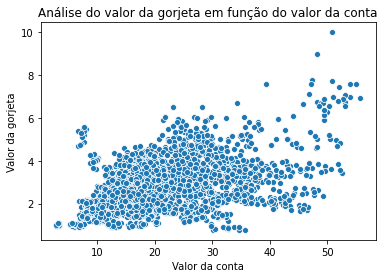

In [ ]:
valor_gorjeta = sns.scatterplot(x = 'valor_da_conta', y = 'gorjeta', data = gorjetas)
valor_gorjeta.set_title('Análise do valor da gorjeta em função do valor da conta')
valor_gorjeta.set(xlabel='Valor da conta', ylabel='Valor da gorjeta')

**Visualmente o valor da gorjeta aumenta conforme aumenta o valor da conta**

Verificando se existem valores nulos:

In [ ]:
print('A base de dados contém {} registros \n'.format(gorjetas.shape[0]))
print('Registros não nulos')
gorjetas.count()

A base de dados contém 3416 registros 

Registros não nulos


valor_da_conta      3416
gorjeta             3416
sobremesa           3416
dia_da_semana       3416
hora_do_dia         3416
total_de_pessoas    3416
dtype: int64

Vemos que não temos valores nulos na nossa base de dados, então podemos acreditar que nossa primeira visualização acima, está correta porque não temos nada quebrando a nossa visualização

**Cálculo da porcentagem para sabermos se esse aumento, de acordo com o valor, da gorjeta é proporcional ao da conta**

In [ ]:
gorjetas['porcentagem'] = (gorjetas['gorjeta']/gorjetas['valor_da_conta']).round(2)

In [ ]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


[Text(0, 0.5, 'Porcentagem'), Text(0.5, 0, 'Valor da conta')]

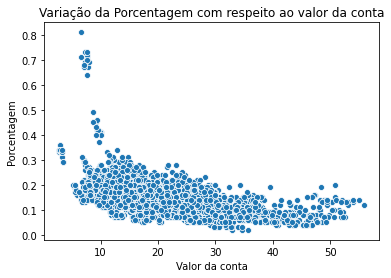

In [ ]:
porcentagem_conta = sns.scatterplot(x = 'valor_da_conta', y = 'porcentagem', data = gorjetas)
porcentagem_conta.set_title('Variação da Porcentagem com respeito ao valor da conta')
porcentagem_conta.set(xlabel='Valor da conta', ylabel='Porcentagem')

**Visualmente, o valor da conta não é proporcional ao valor da gorjeta. Aparentemente é inversamente proporcional, quanto maior o valor da conta, menor o valor da gorjeta.**

**Gerando outra visualização dos mesmos recursos, como um gráfico em formato de linha:**

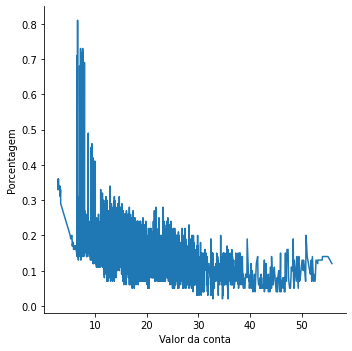

In [ ]:
porcentagem_conta_linha = sns.relplot( x = 'valor_da_conta', y = 'porcentagem', kind = 'line', data = gorjetas)
porcentagem_conta_linha.set(xlabel='Valor da conta', ylabel='Porcentagem')

Transformação do gráfico de dispersão em de linha.

Visualmente a proporção não é linear, pois parece que a porcentagem diminui conforme o valor da conta aumenta mas com oscilações.

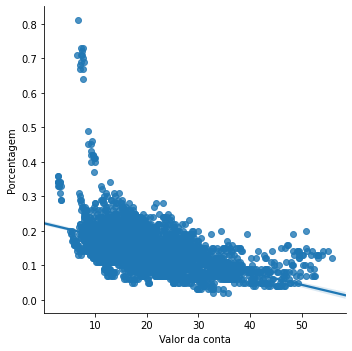

In [ ]:
porcentagem_lmplot = sns.lmplot(x='valor_da_conta', y='porcentagem', data=gorjetas)
# porcentagem_lmplot.set_title('Variação da Porcentagem com respeito ao valor da conta')
porcentagem_lmplot.set(xlabel='Valor da conta', ylabel='Porcentagem')

Com este gráfico, poderemos ver que realmente o valor da porcentagem tende a diminuir com o aumento do valor total da conta.

O valor da conta influencia no valor da gorjeta, mas não de maneira proporcional.

### Análise 2 - Sobremesa e gorjeta


Verificaremos se a sobremesa interfere ou não no valor da gorjeta. Primeiro faremos análise descritiva dos dados e depois análise visual

###### *Análise Descritiva:*

Vamos separar em dois grupos: 

1 - Os que consomem sobremesa

2 - Os que não consomem sobremesa



**1 - Os que consomem sobremesa**

In [ ]:
gorjetas[gorjetas.sobremesa == 'Sim'].head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
56,38.01,3.00,Sim,Sábado,Jantar,4,0.08
58,11.24,1.76,Sim,Sábado,Jantar,2,0.16
60,20.29,3.21,Sim,Sábado,Jantar,2,0.16
61,13.81,2.00,Sim,Sábado,Jantar,2,0.14
62,11.02,1.98,Sim,Sábado,Jantar,2,0.18


In [ ]:
gorjetas[gorjetas.sobremesa == 'Sim'].describe().round(2)

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,1302.00,1302.00,1302.00,1302.00
mean,20.80,2.71,2.41,0.15
std,9.90,1.16,0.81,0.09
min,2.80,0.77,1.00,0.02
25%,13.50,1.91,2.00,0.09
50%,17.92,2.43,2.00,0.15
75%,26.81,3.33,3.00,0.19
max,55.80,10.00,5.00,0.81


>Através dessa descrição, podemos ver:
 - O número de clientes que fizeram solicitação de sobremesa: 1302
 - O número máximo gorjeta:  10.00
 - O valor médio das gorjetas: 2.71

**2 - Os que não consomem sobremesa**

In [ ]:
gorjetas[gorjetas.sobremesa == 'Não'].head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [ ]:
gorjetas[gorjetas.sobremesa == 'Não'].describe().round(2)

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,2114.00,2114.00,2114.00,2114.00
mean,19.22,2.71,2.67,0.15
std,8.32,1.02,1.01,0.04
min,6.53,0.91,1.00,0.04
25%,13.28,1.93,2.00,0.12
50%,17.74,2.61,2.00,0.15
75%,22.75,3.28,3.00,0.18
max,53.09,9.00,6.00,0.33


>Através dessa descrição, podemos ver:
 - O número de clientes que não fizeram solicitação de sobremesa: 2114
 - O número máximo gorjeta:  9.00
 - O valor médio das gorjetas: 2.71

Analisando as duas descrições, observamos que um número maior de pessoas não pediram sobremesa e que sua média é igual a das que pediram, mas seu valor máximo é menor que o de quem pediu.

Vamos analisar isso melhor na análise visual.

###### Análise Visual

Vamos fazer análise visual para saber se de fato o valor da gorjeta é influenciado com o pedido da sobremesa ou não. Através dos gráficos:

1 - Gráfico categórico

2 - Gráfico de tonalidade com relplot (hue para identificar por cor as classificações)

3 - Gráfico de tonalidade com relplot separados em duas colunas(hue para identificar por cor as classificações e col para separar as duas categorias)

4 - Gráfico de tonalidade com linha traçada para melhorar a visualização

5 - Gráfico replot com linhas ao invés de pontos

**1 - Gráfico categórico**

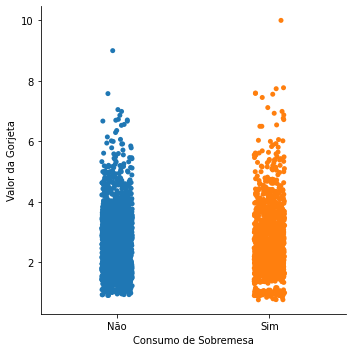

In [ ]:
sim_nao_cat = sns.catplot(x = 'sobremesa', y = 'gorjeta', data = gorjetas)
sim_nao_cat.set(xlabel='Consumo de Sobremesa', ylabel='Valor da Gorjeta')


Poderemos ver que o valor de gorjeta mais alto está no grupo que pediu a sobremesa.

Com base nos dados obtidos através da tabela de descrição das ocorrências de Sim e Não, vimos que o valor máximo do Sim é maior que o de Não e podemos ver isso graficamente agora, confirmando que os dados aqui apresentados estão corretos.

**2 - Gráfico de tonalidade com relplot (hue para identificar por cor as classificações)**

Com o gráfico de classificação e a tabela de descrição, conseguimos ver que o maior valor de gorjeta se encontra com aqueles que consumiram a sobremesa. Agora queremos identificar e afirmar se existe influência direta sobre o valor da gorjeta ao consumo ou não da sobremesa.

Para fazermos esta confirmação, geraremos um segundo gráfico que nos permitirá comprovar essa questão por meio de tonalidades diferentes para cada grupo.


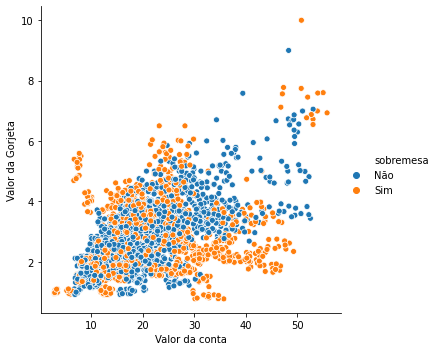

In [ ]:
sim_nao_ton = sns.relplot( x = 'valor_da_conta', y = 'gorjeta', hue='sobremesa', data=gorjetas)
sim_nao_ton.set(xlabel='Valor da conta', ylabel='Valor da Gorjeta')

Analisando este gráfico, poderemos visualizar que os pontos de "não" possuem uma distribuição mais linear do que os de "sim", os quais aparentam mais espaçamento sem grande linearidade. Para melhorar a visualização, vamos separar em dois gráficos.

**3 - Gráfico de tonalidade com relplot separados em duas colunas(hue para identificar por cor as classificações e col para separar as duas categorias)**

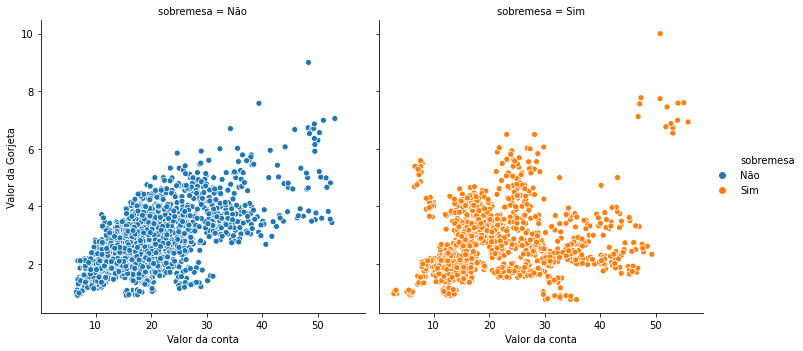

In [ ]:
sim_nao_col = sns.relplot( x = 'valor_da_conta', y = 'gorjeta', col = 'sobremesa', hue='sobremesa', data=gorjetas)
sim_nao_col.set(xlabel='Valor da conta', ylabel='Valor da Gorjeta')

No primeiro gráfico de tonalidades, tínhamos todos os plots na mesma categoria, e neste último temos cada plot em um gráfico diferente legendado.

Com isso, poderemos ver melhor a questão de linearidade de cada caso.

**4 - Gráfico de tonalidade com linha traçada para melhorar a visualização**

Traçando uma linha nesse gráfico conseguimos visualizar melhor essa linearidade. Ela nos permite uma visualização mais clara da situação.

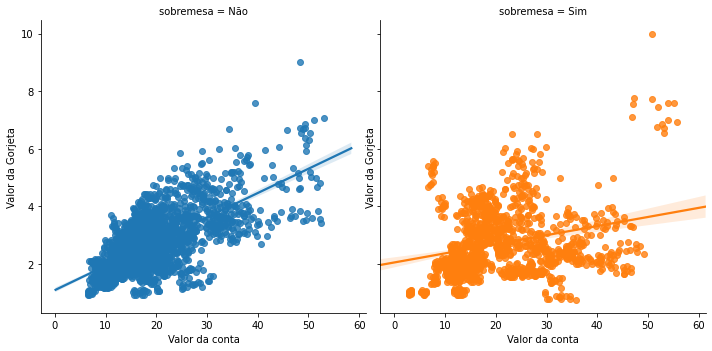

In [ ]:
sim_nao_lin = sns.lmplot(x='valor_da_conta', y='gorjeta', col='sobremesa', hue='sobremesa', data=gorjetas)
sim_nao_lin.set(xlabel='Valor da conta', ylabel='Valor da Gorjeta')

Com isso, podemos ver que existe uma diferença de fato. Visualmente identificamos que aqueles que pediram sobremesa possuem a distribuição diferente em comparação aos que não pediram.

Vamos ver esses valores com relação a proporção:

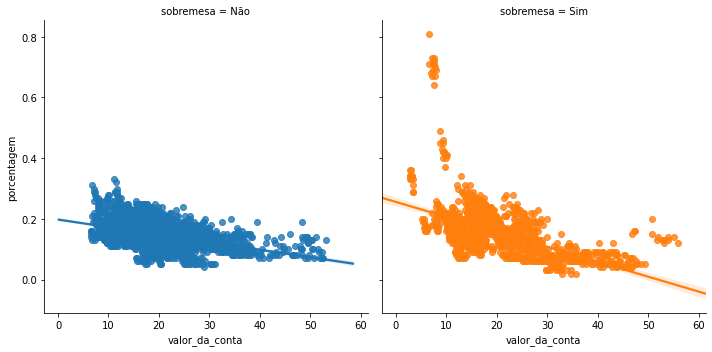

In [ ]:
sns.lmplot(x='valor_da_conta', y='porcentagem', col='sobremesa', hue='sobremesa', data=gorjetas)

Conseguimos visualizar que o grupo que não pediu sobremesa possuirá uma linha mais horizontal, ou seja, foi mais constante, apesar de não proporcional, enquanto os que pediram apresentam maior inclinação da linha.

Então, visualmente, parece que existe uma diferença na gorjeta dependendo se a sobremesa é pedida ou não. 

**5 - Gráfico replot com linhas ao invés de pontos**

Para gorjeta x valor da conta

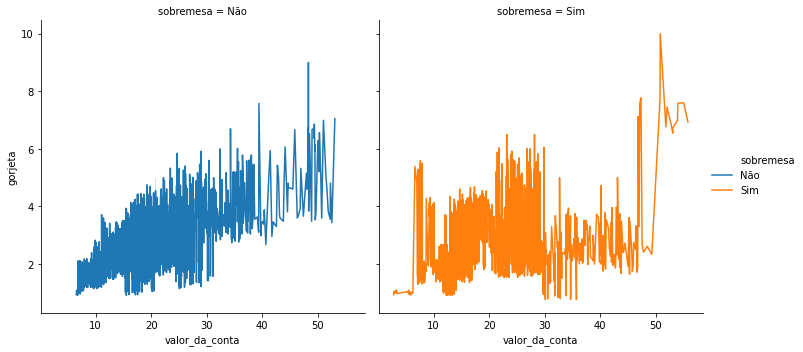

In [ ]:
sns.relplot(x='valor_da_conta', y='gorjeta', col='sobremesa', hue='sobremesa', kind='line', data=gorjetas)

Para a porcentagem x valor da conta:

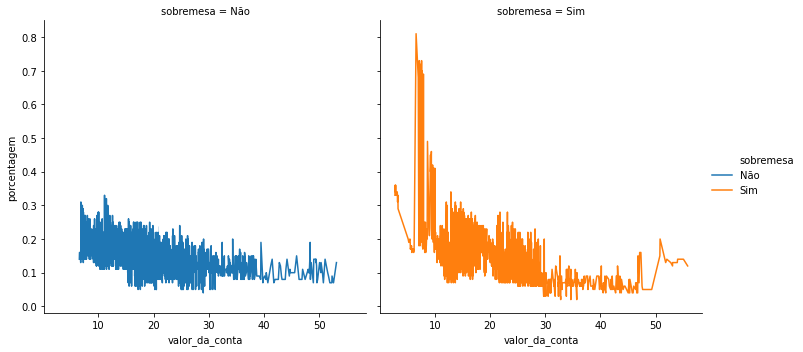

In [ ]:
sns.relplot(x='valor_da_conta', y='porcentagem', col='sobremesa', hue='sobremesa', kind='line', data=gorjetas)


**Conclusão, visualmente existe uma diferença no valor da gorjeta daqueles que pediram sobremesa e não pediram sobremesa, apesar de sutil**




Precisaremos constatar se os dois casos realmente influenciam no valor da gorjeta. Isso só será possível através de um cálculo estatístico.

###### Teste de Hipótese

Vamos entender o comportamento da população com respeito a essa amostra analisada, se realmente o comportamento é diferente com respeito a gorjeta e ao consumo de sobremesa. 

Vamos tentar entender como será o comportamento dos próximos clientes. 
Iremos descobrir se a população geral que consome sobremesa e a que não consome se comportam de forma similar ou diferente.



**H<sup>null**

> **A distribuição da taxa da gorjeta é a mesma nos dois grupos**

**H<sup>alt**

> **A distribuição da taxa da gorjeta não é a mesma nos dois grupos**

In [ ]:
from scipy.stats import ranksums

In [ ]:
sobremesa = gorjetas.query('sobremesa == "Sim"').porcentagem
#MESMA coisa da query acima: sobremesa = gorjetas.porcentagem[gorjetas.sobremesa == 'Sim']

In [ ]:
sem_sobremesa = gorjetas.query("sobremesa == 'Não'").porcentagem

In [ ]:
r = ranksums(sobremesa, sem_sobremesa)

In [ ]:
print('O valor do p-value é {}'.format((r.pvalue).round(3)))

O valor do p-value é 0.033


Como o valor do p-value < 0.05, isso significa que rejeito a hipótese nula e aceito a alt, onde diz que a distribuição da gorjeta NÃO é a mesma nos dois grupos. 
Isso significa que esses dois grupos têm gorjetas diferentes entre si. E podemos dizer que a população de onde eles vem será diferente também.

**A distribuição da taxa da gorjeta não é a mesma nos dois grupos**

### Análise 3 - Dia da Semana

Vamos analisar agora a relação do dia da semana com as gorjetas para podermos entendermos o comportamento dos nossos clientes.

**Análise Visual:**

1 - Gráfico categoria para que possamos ver se há algum dia da semana em que as pessoas gastam mais ao final.

2 - Gráfico de tonalidade com relplot (hue para identificar por cor os dias da semana) relacionando o valor da conta com os dias da semana e depois a porcentagem

3 - Gráfico de tonalidade com relplot separados em colunas (hue para identificar por cor as classificações e col para separar as duas categorias) - Para melhor visualização, separaremos cada dia da semana com os dois plots feitos, relacionados com valor da gorjeta e valor da conta e depois com a porcentagem

4 - Gráfico de tonalidade com linha traçada para melhorar a visualização - traçaremos uma linha para cada dia da semana relacionados à porcentagem

**Análise Descritiva**

Faremos análises descritivas em relação ao valor da conta, porcentagem, média de gorjetas

**Teste de Hipótese**

###### Análise Visual: 

 **1 - Gráfico categoria para que possamos ver se há algum dia da semana em que as pessoas gastam mais ao final**

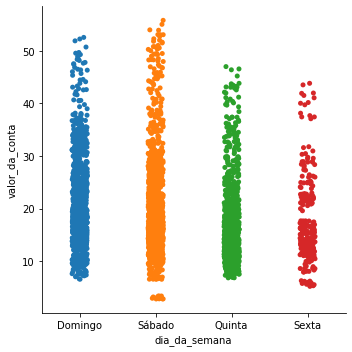

In [ ]:
sns.catplot(x = 'dia_da_semana', y = 'valor_da_conta', data = gorjetas)

Visualmente, quinta e sextas são os dias que as pessoas menos gastam no restaurante, enquanto sábado e domingo apresentam os maiores valores da conta.

**2 - Gráfico de tonalidade com relplot (hue para identificar por cor os dias da semana) relacionando o valor da conta com os dias da semana e depois a porcentagem**

**dias da semana vs valor da conta**

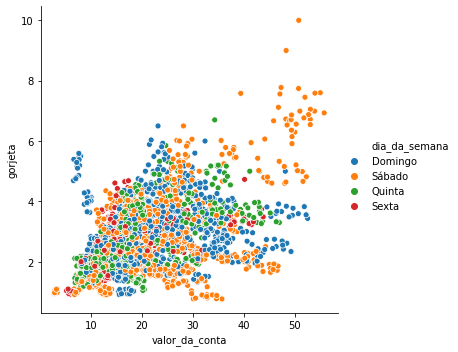

In [ ]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', data=gorjetas)

Com este gráfico, vemos que os valores da gorjeta são um pouco menor nas sextas e quintas, e são maiores aos sábados e domingos.

**porcentagem vs valor da conta**

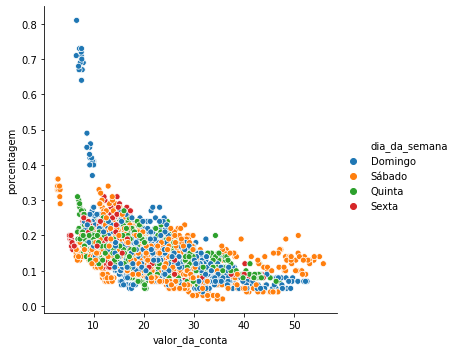

In [ ]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', data=gorjetas)

Dessa forma a visualização fica complicada, a fim de melhorarmos, vamos para a 3<sup>a</sup> etapa.

**3 - Gráfico de tonalidade com relplot separados em colunas (hue para identificar por cor as classificações e col para separar as duas categorias) - Para melhor visualização, separaremos cada dia da semana com os dois plots feitos, relacionados com valor da gorjeta e valor da conta e depois com a porcentagem**

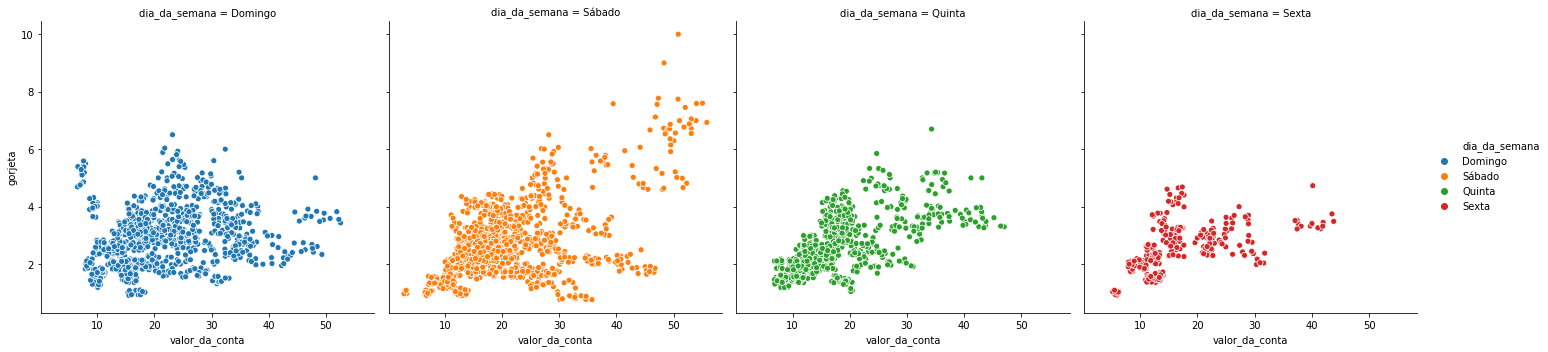

In [ ]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

Domingo bem distribuído, Sabádo consigo ver uma linha, um valor crescendo, diferente da distribuição do domingo. Quinta também tem algo similar a uma linha. Sexta tenho bem menos pontos. Visualmente, Quinta, sábado e domingo são os dias que têm mais pessoas.

Visualmente, poderemos reparar que realmente quinta, sábado e domingo são os dias com mais pessoas no restaurante.

Em seguida, geraremos um novo gráfico com estas mesmas propriedades, substituindo o eixo y por 'porcentagem'

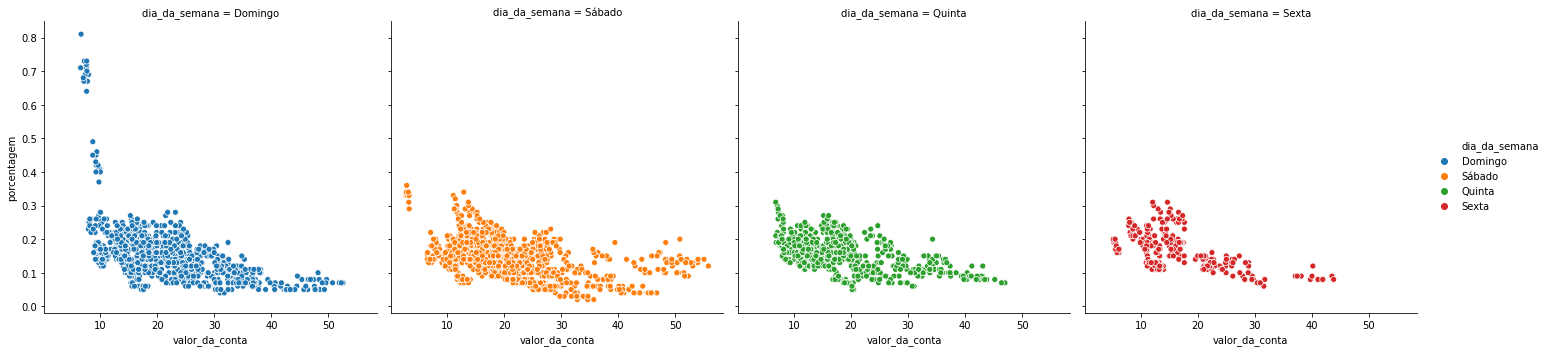

In [ ]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

**4 - Gráfico de tonalidade com linha traçada para melhorar a visualização - traçaremos uma linha para cada dia da semana relacionados à porcentagem**

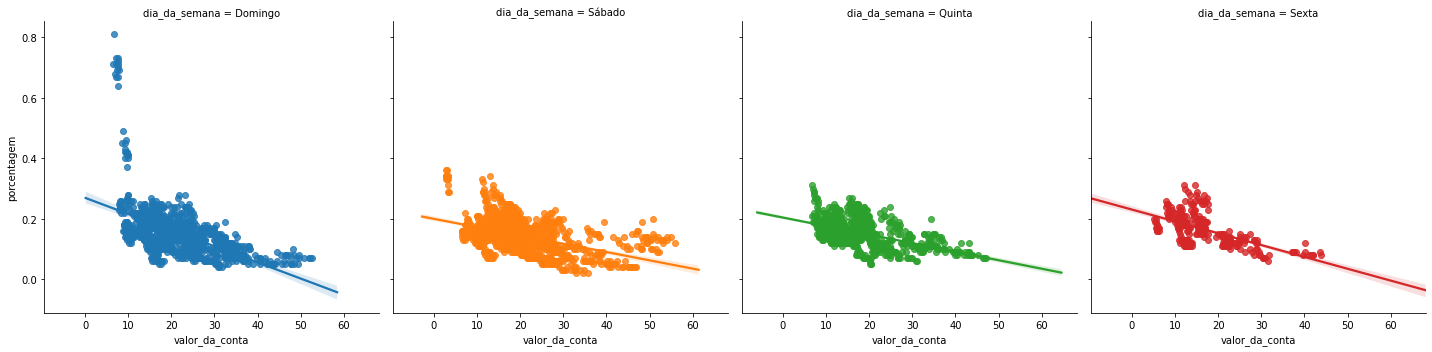

In [ ]:
sns.lmplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

Assim, perceberemos melhor as diferenças entre os dias, constatando algumas observações: todas as porcentagens caem conforme o valor da conta sobe, e percebemos maiores distinções entre o domingo e o sábado.

###### Análise Descritiva

**Média geral das gorjetas**

In [ ]:
media_geral_gorjetas = gorjetas.gorjeta.mean()

In [ ]:
print('A média geral das gorjetas é de {}'.format(media_geral_gorjetas))

A média geral das gorjetas é de 2.7111892140916103


**Agora, faremos a média geral dos valores para quinta, sexta, sábado e domingo**

In [ ]:
gorjetas.groupby(['dia_da_semana']).mean()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
dia_da_semana,,,,
Domingo,21.439133,2.902079,2.842105,0.154953
Quinta,17.724088,2.556177,2.451613,0.154090
Sexta,17.215616,2.549960,2.105263,0.163158
Sábado,20.480249,2.690114,2.517241,0.143604


Pelas informações da tabela, poderemos ver que o dia com a maior média de gorjeta é domingo.

*A média do total_de_pessoas deve ser feita por números inteiros, já que não é possível ter números decimais neste caso. Portanto, removeremos este campo de nossa análise.*

In [ ]:
gorjetas.groupby(['dia_da_semana']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.439133,2.902079,0.154953
Quinta,17.724088,2.556177,0.154090
Sexta,17.215616,2.549960,0.163158
Sábado,20.480249,2.690114,0.143604


A média de porcentagem possui o menor valor no sábado, em comparação com os demais dias. Ou seja, sábado é o dia da semana com a menor proporção de gorjeta x valor da conta

Estamos olhando somente a média dos valores, sem levar em consideração o número de contas, que poderemos dizer de atendimentos, uma vez que uma mesa pode ter 1 ou mais pessoas em cada dia.

Vendo a frequência desses dias:

In [ ]:
gorjetas.dia_da_semana.value_counts()

Sábado     1218
Domingo    1064
Quinta      868
Sexta       266
Name: dia_da_semana, dtype: int64

###### Teste de Hipóteses

**H<sup>null</sup>**
> **A distribuição do valor da conta é igual para o sábado e domingo**


**H<sup>alt</sup>**
> **A distribuição do valor da conta não é igual para o sábado e domingo**

In [ ]:
valor_conta_domingo = gorjetas.query('dia_da_semana == "Domingo"').valor_da_conta

In [ ]:
valor_conta_sabado = gorjetas.query("dia_da_semana == 'Sábado'").valor_da_conta

In [ ]:
r2 = ranksums(valor_conta_domingo, valor_conta_sabado)

In [ ]:
print('O valor do p-value é {}'.format(r2.pvalue))

O valor do p-value é 0.0004435935681441821


**H<sup>alt</sup>**
> **A distribuição do valor da conta não é igual para o sábado e domingo**


O resultado de pvalue é 0.00044, ou seja, apenas aceitaremos a hipótese alternativa se este número for menor do que 0.05; como ele é, ela é válida. Isso significa que a distribuição do valor da conta é diferente no sábado e no domingo.

Portanto, o sábado que é mais frequentado e o domingo que tem a maior média de gorjetas, são diferentes no que diz respeito ao valor da conta.

### Análise 4 - Hora do dia

A análise visual usará os seguintos gráficos:

1 - Distplot

2 - Boxplot

3 - Violinplot


###### Análise Visual

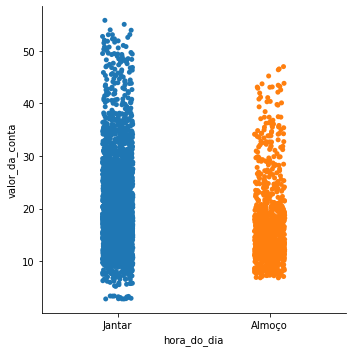

In [ ]:
sns.catplot(x='hora_do_dia', y='valor_da_conta', data = gorjetas)

Aparentemente, o jantar é o momento do dia com os maiores valores de conta. Perceberemos que existem alguns pontos com quantias muito parecidas, e poderemos aplicar um parâmetro que nos permitirá visualizar melhor todos os pontos separadamente. Parâmetro kind sendo igual a 'swarm'.

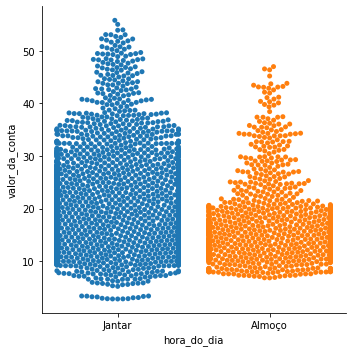

In [ ]:
sns.catplot(x='hora_do_dia', y='valor_da_conta', kind='swarm', data=gorjetas)

Desta forma, conseguiremos visualizar melhor cada um dos pontos do gráfico. Conseguimos ver que um grupo grande ta um pouco acima do 10.

Geraremos um outro gráfico interessante por meio de violinplot(), sendo justamente a tradução de "violino" para o inglês. Que mostra quantos dados eu tenho em cada região.

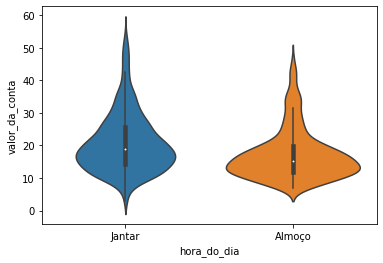

In [ ]:
sns.violinplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

Neste gráfico, conseguiremos ver que há um grupo bem grande com valor da conta próximo de 20 no jantar, e outro maior ainda por volta dos 15 na hora do almoço.

Em seguida, visualizaremos os dois grupos lado a lado, analisando a média dos valores para cada horário do dia.

Este novo gráfico utilizará o comando boxplot() recebendo os mesmos valores nos eixos anteriores.

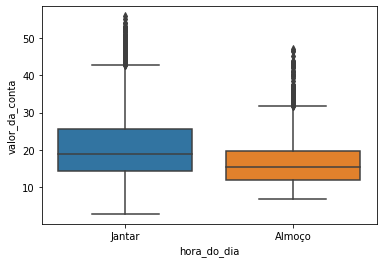

In [ ]:
sns.boxplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

Desta forma, poderemos ver mais claramente que a média dos valores da conta no horário do jantar é diferente da média do almoço.

Outro gráfico bastante conhecido e tradicional que utilizaremos em nossa análise é o histograma por meio de distplot().

In [ ]:
almoco = gorjetas.query('hora_do_dia == "Almoço"').valor_da_conta

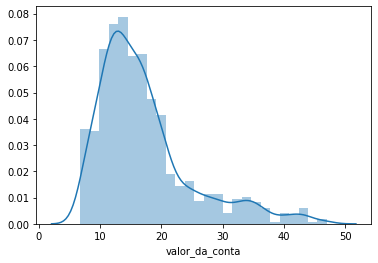

In [ ]:
sns.distplot(almoco)

Um gráfico que tem, no eixo X, o valor da variável sendo exibida e no outro eixo, a frequência.

No nosso caso, o eixo X é o valor da conta e o eixo Y é quantidade de vezes que aquele item aparece na distribuição.

In [ ]:
jantar = gorjetas.query("hora_do_dia == 'Jantar'").valor_da_conta

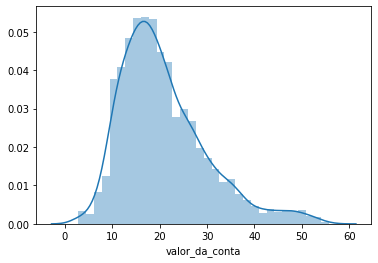

In [ ]:
sns.distplot(jantar)

Com esses gráficos gerados, poderemos ver que são bastante diferentes.

A seguir, verificaremos com testes de hipóteses se o valor das contas de sábado são, de fato, diferente dos valores de domingo.

##### Análise Descritiva

Faremos algumas análises em relação a hora do dia.

Já geramos alguns gráficos, mas queremos uma descrição estatística com números do que estamos visualizando. Nossa análise será para saber se a hora do dia tem influência sobre o valor da conta.

In [ ]:
gorjetas.groupby(['hora_do_dia']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
hora_do_dia,,,
Almoço,17.213913,2.534495,0.157668
Jantar,20.832954,2.779458,0.148876


###### Teste de Hipóteses

Com isso, poderemos ver que a média do valor da conta e da gorjeta no almoço são menores em relação ao jantar. A porcentagem do almoço é maior que a do jantar.

**H <sup>null</sup>**
>**A distribuição do valor da conta é igual no jantar e no almoço**

**H <sup>alt</sup>**
>**A distribuição do valor da conta não é igual no jantar e no almoço**

In [ ]:
jantar = gorjetas.query("hora_do_dia == 'Jantar'").valor_da_conta

In [ ]:
almoco = gorjetas.query('hora_do_dia == "Almoço"').valor_da_conta

In [ ]:
r3 = ranksums(jantar, almoco)
r3

RanksumsResult(statistic=12.158511455786174, pvalue=5.169201062207143e-34)

**H <sup>null</sup>**
>**A distribuição do valor da conta é igual no jantar e no almoço**

O sistema retorna um pvalue maior do que 0.05, o que significará que a distribuição é diferente nos dois períodos do dia e que a hipótese zero poderá ser aceita. Nesse caso, posso aceitar porque a distribuição da conta é igual no jantar e no almoço, ou seja, temos dois grupos iguais aqui.

**Teste de Hipótese 2 para a porcentagem agora**

**H <sup>null</sup>**
>**A distribuição da taxa da gorjeta é igual no jantar e no almoço**

**H <sup>alt</sup>**
>**A distribuição da taxa da gorjeta não é igual no jantar e no almoço**

In [ ]:
porcentagem_almoco = gorjetas.query("hora_do_dia == 'Almoço'").porcentagem

In [ ]:
porcentagem_jantar = gorjetas.query("hora_do_dia == 'Jantar'").porcentagem

In [ ]:
r3 = ranksums(porcentagem_almoco, porcentagem_jantar)

In [ ]:
print('O valor do p-value é de {}'.format(r3.pvalue))

O valor do p-value é de 1.3785725618355523e-11


O valor do pvalue é superior a 0.05, o que significará que temos grupos parecidos. Ou seja, a distribuição da porcentagem (taxa da gorjeta) é igual de fato no almoço e no jantar.

**H <sup>null</sup>**
>**A distribuição da taxa da gorjeta é igual no jantar e no almoço**